In [1]:
import pandas as pd
import numpy as np
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_paths = []
exclusions = ['xls','pdf','weight','Plist','00','4','5','6','7','8','9']
for file_path in glob.glob('2015-2016/*', recursive = True):
    skip = False
    for exclusion in exclusions:
        if exclusion in os.path.basename(file_path):
            skip = True
    if skip:
        continue
    
    file_paths.append(file_path)

In [3]:
sections_data = {}
for file_path in file_paths:
    sections_data[os.path.basename(file_path).replace('.sav','')] = pd.read_spss(file_path)

In [4]:
for key in sections_data.keys():
    sections_data[key].columns = sections_data[key].columns.str.lower()

In [5]:
sections_data.keys()

dict_keys(['Roster', 'sec 1B', 'sec 2A', 'sec 3A', 'Sec ICT'])

In [6]:
for key in sections_data.keys():
    for col in sections_data[key].columns:
        try:
            sections_data[key][col] = sections_data[key][col].str.strip()
        except:
            continue

In [7]:
combined_data = sections_data['Roster']
index = ['hhcode', 'psu','province','idc']
for key in sections_data.keys():
    if key in ['Roster']:
        continue
    if 'idc' in sections_data[key].columns:
        combined_data = pd.merge(combined_data, sections_data[key], on = index, how = 'outer')
    else:
        combined_data = pd.merge(combined_data, sections_data[key], on = index[0:3], how = 'outer')

C:\Users\Ali Sheryar\AppData\Local\Temp\ipykernel_18384\896311685.py:9: FutureWarning: Passing 'suffixes' which cause duplicate columns {'sec_x', 'region_x'} in the result is deprecated and will raise a MergeError in a future version.
  combined_data = pd.merge(combined_data, sections_data[key], on = index[0:3], how = 'outer')


In [8]:
combined_data

,hhcode,province,region_x,psu,sec_x,idc,s1aq02,s1aq03,s1aq04,s1aq05,...,sictq0703,sictq0704,sictq0705,sictq0706,sictq0801,sictq0802,sictq0803,sictq0804,sictq0805,sictq0806
0,1.102010e+09,KP,urban,11020101.0,01A,1.0,Head,NaN,Male,present,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.102010e+09,KP,urban,11020101.0,01A,2.0,Nephew\Niece,Main Economic Provider,Male,present,...,NaN,NaN,NaN,NaN,"Email, Chatting, Facebook etc",NaN,NaN,NaN,NaN,NaN
2,1.102010e+09,KP,urban,11020101.0,01A,3.0,Nephew\Niece,Main Economic Provider,Male,present,...,NaN,NaN,NaN,NaN,Education and reserach,NaN,NaN,NaN,NaN,NaN
3,1.102010e+09,KP,urban,11020101.0,01A,51.0,Spouse,Main Economic Provider,Female,present,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.102010e+09,KP,urban,11020101.0,01A,52.0,Son/Daughter,Main Economic Provider,Female,present,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157770,6.113340e+09,Punjab,urban,61133402.0,01A,3.0,Brother\Sister,Main Economic Provider,Male,present,...,NaN,NaN,NaN,NaN,All of the above,NaN,NaN,NaN,NaN,NaN
157771,6.113340e+09,Punjab,urban,61133402.0,01A,1.0,Head,NaN,Male,present,...,NaN,NaN,NaN,NaN,Information seeking,Business Purpose,NaN,NaN,NaN,NaN
157772,6.113340e+09,Punjab,urban,61133402.0,01A,2.0,Son/Daughter,Main Economic Provider,Male,present,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157773,6.113340e+09,Punjab,urban,61133402.0,01A,51.0,Spouse,Main Economic Provider,Female,present,...,NaN,NaN,NaN,NaN,All of the above,NaN,NaN,NaN,NaN,NaN


In [9]:
metric_df = combined_data.loc[:, 'sictq01':'sictq0806'].copy()

In [10]:
metric_df['sictq01'] = metric_df['sictq01'].replace({' NO':0, ' YES':1}).fillna(0)

In [11]:
for col in metric_df.loc[:,'sictq0201':'sictq0206'].columns:
    metric_df[col] = metric_df[col].str.strip()

In [12]:
metric_df.loc[:,'sictq0201':'sictq0206'] = metric_df.loc[:,'sictq0201':'sictq0206'].replace({
    'Copying or moving a file or folder':1,
    'Using copy and paste tools to duplicate or move information within a document':2,
    'Sending e-mails with attached files (For example, a document, picture, video)':3,
    'Using basic arithmetic formulas in a spreadsheet':4,
    'Finding, downloading, installing and configuring software':5,
    'Creating electronic presentations with presentation software (Including text, images, sound, video or charts':6,
    'Transferring files between a computer and other devices':7,
    'Writing a computer program using a specialized programming language':8,
    'All of the above':1+2+3+4+5+6+7+8
})

C:\Users\Ali Sheryar\AppData\Local\Temp\ipykernel_18384\1728357993.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  metric_df.loc[:,'sictq0201':'sictq0206'] = metric_df.loc[:,'sictq0201':'sictq0206'].replace({


In [13]:
metric_df['sictq03'] = metric_df['sictq03'].replace({'NO':0, 'YES':1})

In [14]:
metric_df['sictq04'] = metric_df['sictq04'].replace({'NO':0, 'YES':1})

In [15]:
metric_df['sictq05'] = metric_df['sictq05'].replace({
    'At least once a day':3,
    'At least once a week but not every day':2,
    'At least once a month':1
})

In [16]:
metric_df['sictq06'] = metric_df['sictq06'].replace({'NO':0, 'YES':1})

In [17]:
metric_df.loc[:, 'sictq0701':'sictq0706'] = metric_df.loc[:, 'sictq0701':'sictq0706'].replace({
    'Home':1,
    'Another person’s home':1,
    'Work':2,
    'Place of education':2,
    'Community Internet access facility':3,
    'Commercial Internet access facility':3,
    'In mobility – use of the Internet while mobile':4,
    'All of the above':1+1+2+2+3+3+4,
    'Other locations (please specify)':1
})

C:\Users\Ali Sheryar\AppData\Local\Temp\ipykernel_18384\2372103153.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  metric_df.loc[:, 'sictq0701':'sictq0706'] = metric_df.loc[:, 'sictq0701':'sictq0706'].replace({


In [18]:
metric_df.loc[:,'sictq0801':'sictq0806'] = metric_df.loc[:,'sictq0801':'sictq0806'].replace({
    'Email, Chatting, Facebook etc':1,
    'Education and reserach':3,
    'Voice & Video calls on skype, whatsapp etc':1.5,
    'Downloading software’s, programs':4,
    'Online shopping /banking':4,
    'Information seeking':3,
    'Downloading/Watching movies, dramas etc':5,
    'Business Purpose':4,
    'All of the above':1+3+1.5+4+4+3+5+4
})

C:\Users\Ali Sheryar\AppData\Local\Temp\ipykernel_18384\2088963193.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  metric_df.loc[:,'sictq0801':'sictq0806'] = metric_df.loc[:,'sictq0801':'sictq0806'].replace({


In [19]:
metric_df['metric'] = metric_df.sum(axis = 1)

C:\Users\Ali Sheryar\AppData\Local\Temp\ipykernel_18384\2716694562.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  metric_df['metric'] = metric_df.sum(axis = 1)


In [20]:
combined_data['metric'] = metric_df['metric']/metric_df['metric'].max()

In [21]:
combined_data = combined_data.rename(columns = {'s1aq04':'gender', 's1aq07':'marital status','s1aq05':'resident status','s2ac05':'education level'})

<AxesSubplot:ylabel='metric'>

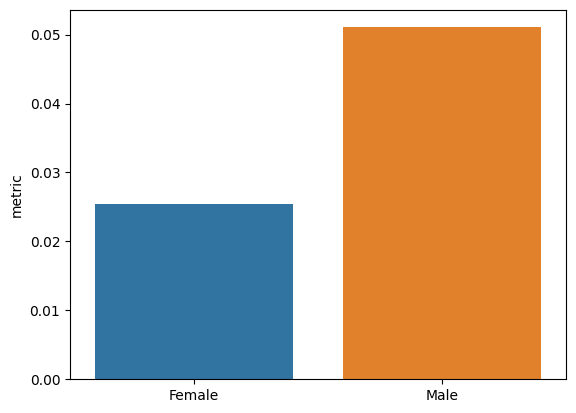

In [22]:
sns.barplot(x = combined_data['gender'].sort_values().unique(), y = combined_data.groupby('gender')['metric'].mean())

In [24]:
len(combined_data.query("metric < 0.02"))/len(combined_data)

0.8843352875930914

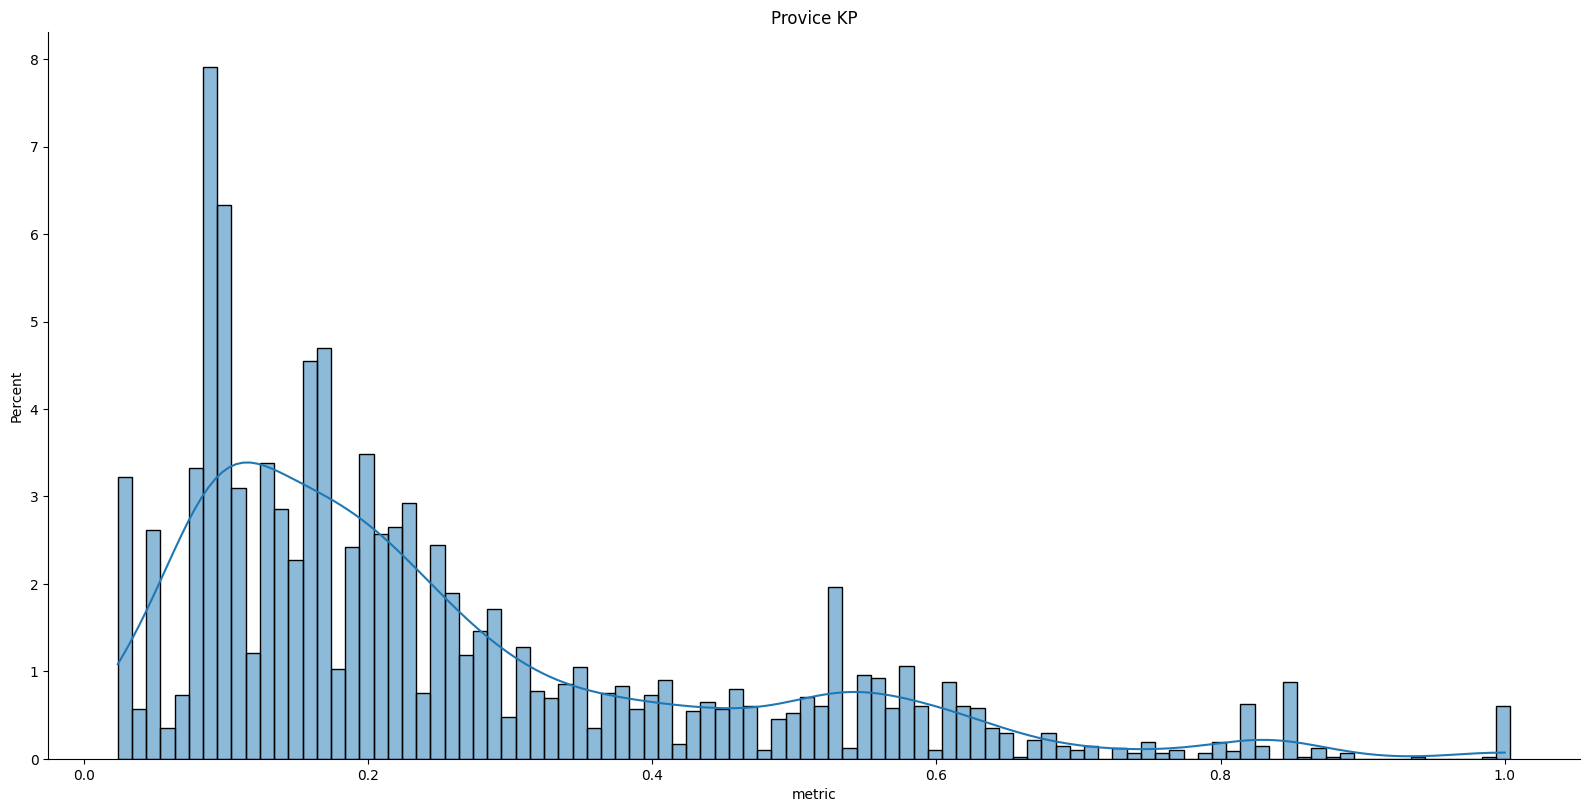

0.873820692563116


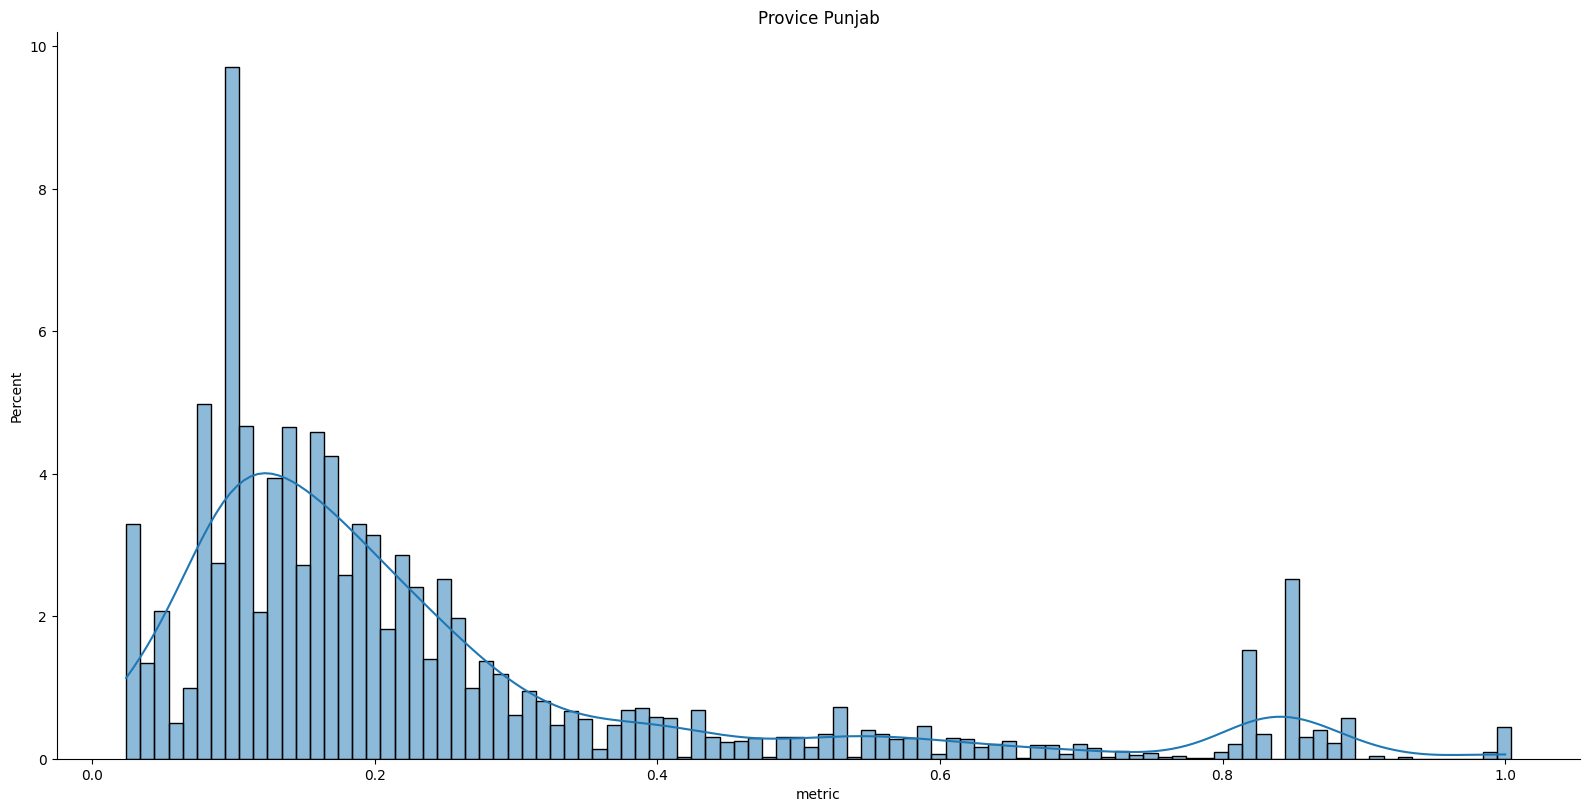

0.8741753362090839


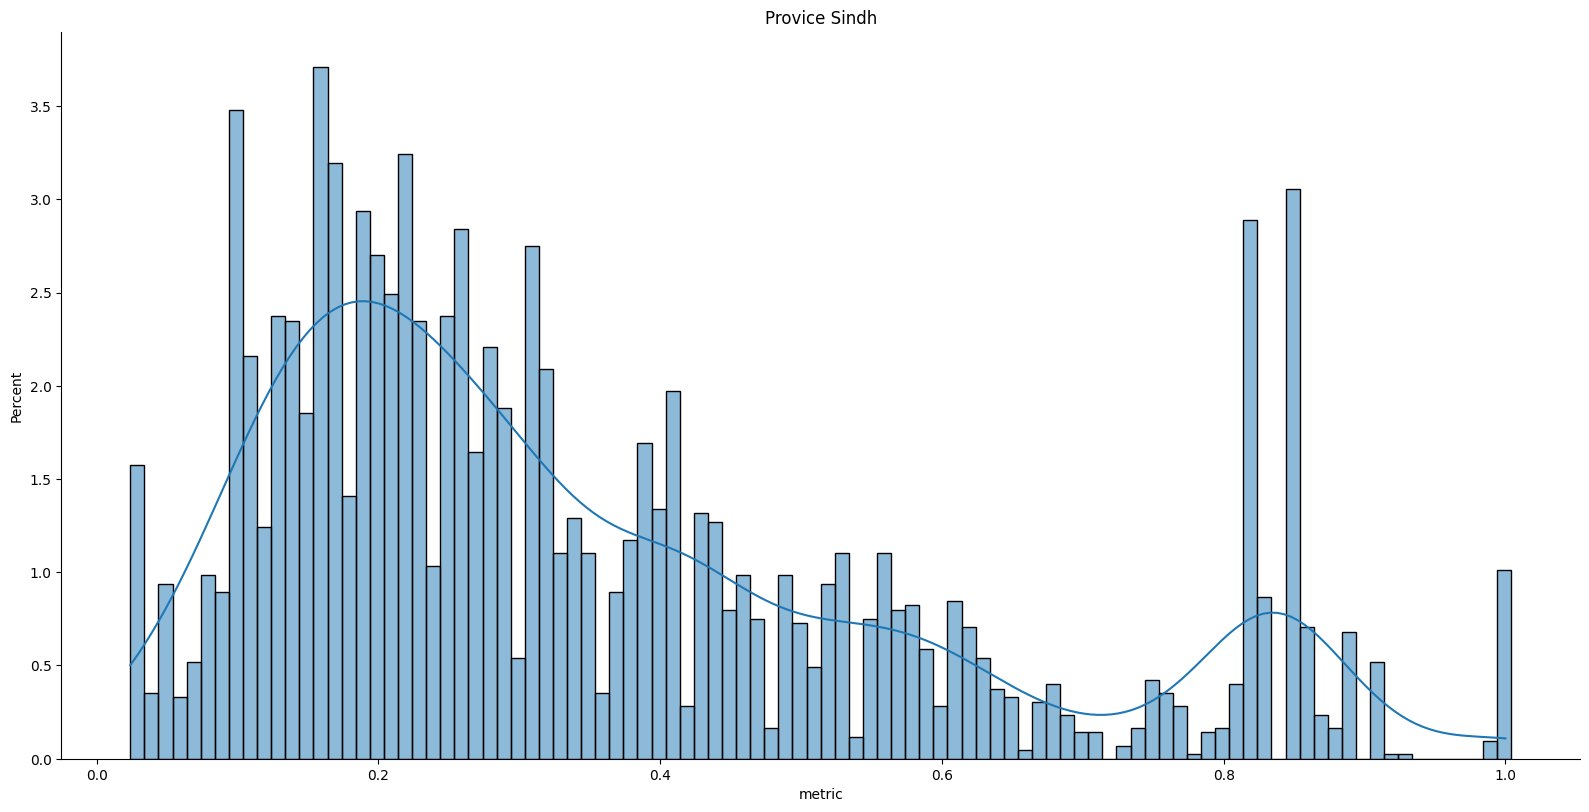

0.8873898896912943


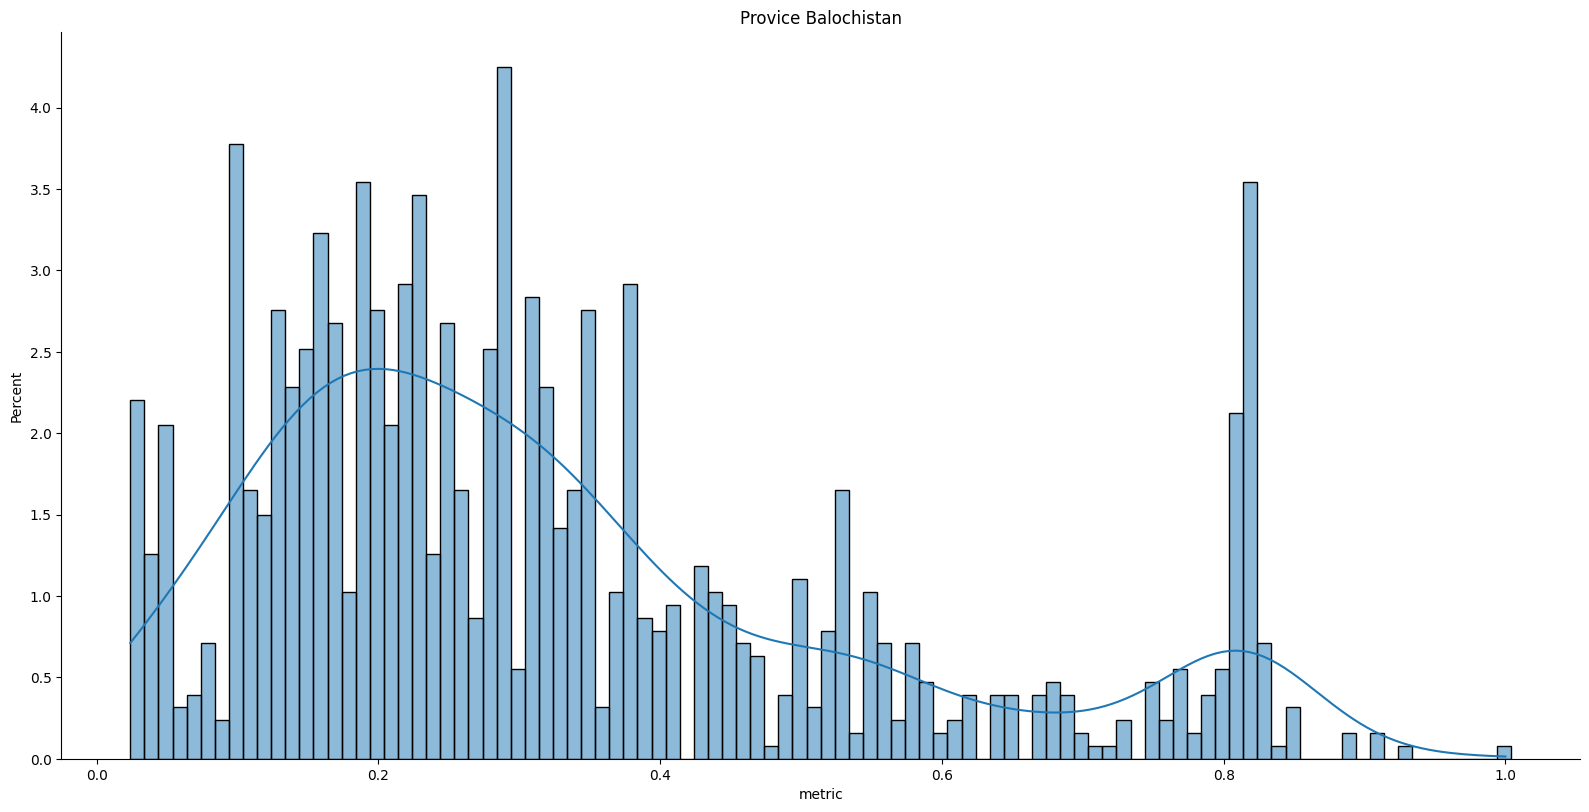

0.9330521876647337


In [25]:
for i in combined_data['province'].unique():
    fig = sns.displot(data = combined_data.loc[(combined_data['province'] == i) & (combined_data['metric'] > 0.02), 'metric'], binwidth = 0.01, height = 8, aspect = 2, stat = 'percent', kde = True)
    plt.title('Provice ' + str(i))
    plt.show()
    print(len(combined_data.loc[(combined_data['province'] == i) & (combined_data['metric'] < 0.02)])/len(combined_data.loc[combined_data['province'] == i]))

In [26]:
combined_data = combined_data.rename(columns = {'s1aq04':'gender', 's1aq07':'marital status','s1aq05':'resident status','s2ac05':'education level'})

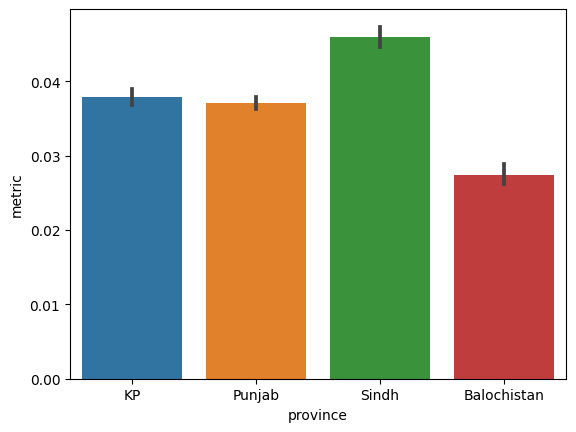

In [27]:
fig = sns.barplot(x = combined_data['province'], y = combined_data['metric'])

In [28]:
for i in combined_data['province'].unique():
    print(i, combined_data.loc[combined_data['province'] == i, 'metric'].mean())

KP 0.03787733656178919
Punjab 0.0370336148307293
Sindh 0.045912302052509534
Balochistan 0.02745400080177021


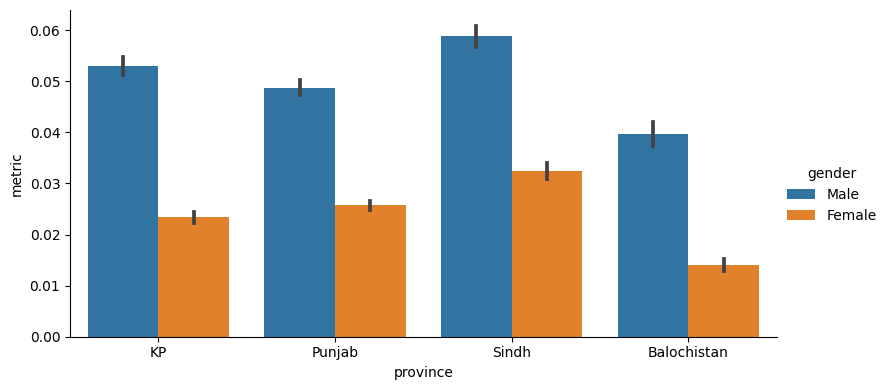

In [29]:
fig = sns.catplot(x = 'province', y = 'metric', hue = 'gender', data = combined_data, kind = 'bar', height = 4, aspect = 2)

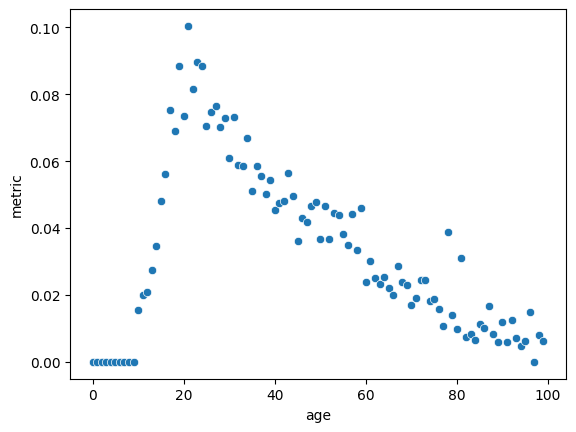

In [30]:
fig = sns.scatterplot(x = 'age', y = 'metric', data = combined_data[['age','metric']].groupby('age').mean())

In [31]:
combined_data[['age','metric']].groupby('age').mean().idxmax()

metric    21.0
dtype: float64

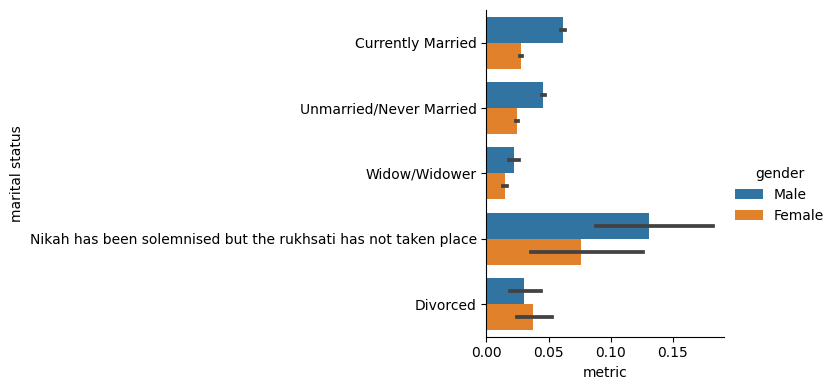

In [32]:
fig = sns.catplot(x = 'metric', y = 'marital status', hue = 'gender', data = combined_data, kind = 'bar', height = 4, aspect = 2, orient = 'h')

In [33]:
combined_data['education level'] = combined_data['education level'].replace({
    'less than 1':0,
    'class 1':1,
    'class 2':2,
    'class 3':3,
    'class 4':4,
    'class 5':5,
    'class 6':6,
    'class 7':7,
    'class 8':8,
    'class 9':9,
    'class 10':10,
    'Polytechnic Diploma':11,
    'FA/FSc/I-COM':12,
    'BA/BSc/B.com/B.Ed/Post Graduate':13,
    'B.Ed/M.Ed':13,
    'B.A/B.SC/BS/BE':13,
    'MA/MSc/MEd':14,
    'Degree in Medicine':13,
    'Degree in Agriculture':13,
    'Degree in Law':13,
    'Degree in Engineering':13,
    'Mphil/PhD':14,
    'Others':7
}).fillna(0)

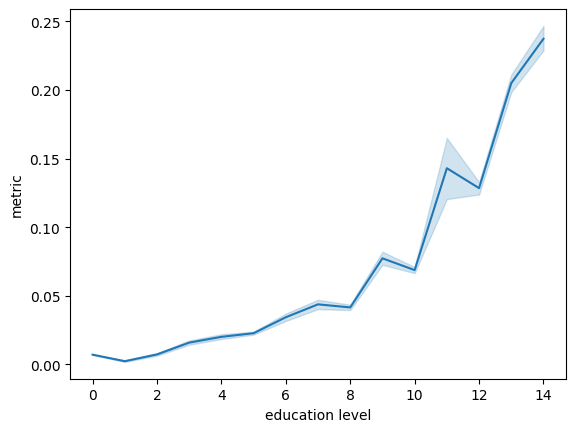

In [34]:
fig = sns.lineplot(x =combined_data['education level'].astype(float), y = combined_data['metric'])

In [ ]:
import geopy as gpy

In [ ]:
Coding = pd.read_excel('2015-2016\code.xlsx')
locator = gpy.Nominatim(user_agent="myGeocoder")
names = (Coding['District'] + ' Pakistan')       
Coding['x'] = None
Coding['y'] = None
for i in names.index:
    location = locator.geocode(names[i], timeout = None)
    if location == None:
        Coding.loc[i, 'x'] = None
        Coding.loc[i, 'y'] = None
    else:
        Coding.loc[i, 'x'] = location[-1][0]
        Coding.loc[i, 'y'] = location[-1][1]

In [ ]:
Coding.loc[5,'x'] = 34.394322
Coding.loc[5,'y'] = 72.615117
Coding.loc[8,'x'] = 34.3338823
Coding.loc[8,'y'] = 73.20106220000002
Coding.loc[12,'x'] = 34.539557
Coding.loc[12,'y'] = 72.875179
Coding.loc[15,'x'] = 34.168181
Coding.loc[15,'y'] = 71.750386
Coding.loc[17,'x'] = 34.010464
Coding.loc[17,'y'] = 71.987553
Coding.loc[30,'x'] = 31.608206
Coding.loc[30,'y'] = 71.085433
Coding.loc[36,'x'] = 30.970936
Coding.loc[36,'y'] = 72.482647
Coding.loc[40,'x'] = 32.574165
Coding.loc[40,'y'] = 73.482837
Coding.loc[49,'x'] = 30.35729
Coding.loc[49,'y'] = 73.382658
Coding.loc[69,'x'] = 26.805778
Coding.loc[69,'y'] = 68.047751
Coding.loc[84,'x'] = 30.738329
Coding.loc[84,'y'] = 67.284788
Coding.loc[86,'x'] = 28.980369
Coding.loc[86,'y'] = 62.450415
Coding.loc[93,'x'] = 33.883157
Coding.loc[93,'y'] = 72.493861
Coding.loc[94,'x'] = 29.553206
Coding.loc[94,'y'] = 67.880824
Coding.loc[99,'x'] = 29.229304
Coding.loc[99,'y'] = 67.666223
Coding.loc[101,'x'] = 28.428322
Coding.loc[101,'y'] = 68.023904
Coding.loc[110,'x'] = 26.008055
Coding.loc[110,'y'] = 63.038306
Coding.loc[112,'x'] = 26.970599
Coding.loc[112,'y'] = 64.08868
Coding.loc[118,'x'] = 34.394322
Coding.loc[118,'y'] = 72.615117
Coding.loc[121,'x'] = 34.331259
Coding.loc[121,'y'] = 73.198001
Coding.loc[125,'x'] = 34.539557
Coding.loc[125,'y'] = 72.875179
Coding.loc[128,'x'] = 34.168181
Coding.loc[128,'y'] = 71.750386
Coding.loc[130,'x'] = 34.010464
Coding.loc[130,'y'] = 71.987553
Coding.loc[143,'x'] = 31.608206
Coding.loc[143,'y'] = 71.085433
Coding.loc[149,'x'] = 30.970936
Coding.loc[149,'y'] = 72.482647
Coding.loc[153,'x'] = 32.574165
Coding.loc[153,'y'] = 73.482837
Coding.loc[162,'x'] = 30.35729
Coding.loc[162,'y'] = 73.382658
Coding.loc[182,'x'] = 26.805778
Coding.loc[182,'y'] = 68.047751
Coding.loc[203,'x'] = 30.738329
Coding.loc[203,'y'] = 67.284788
Coding.loc[205,'x'] = 28.980369
Coding.loc[205,'y'] = 62.450415
Coding.loc[212,'x'] = 33.883157
Coding.loc[212,'y'] = 72.493861
Coding.loc[213,'x'] = 29.553206
Coding.loc[213,'y'] = 67.880824
Coding.loc[218,'x'] = 29.229304
Coding.loc[218,'y'] = 67.666223
Coding.loc[220,'x'] = 28.428322
Coding.loc[220,'y'] = 68.023904
Coding.loc[229,'x'] = 26.008055
Coding.loc[229,'y'] = 63.038306
Coding.loc[231,'x'] = 26.970599
Coding.loc[231,'y'] = 64.08868

In [ ]:
combined_data['Pcode'] = combined_data['psu'].astype('string').str[:4].astype(int)

In [ ]:
for index in Coding.index:
    code = int(Coding.loc[index, 'Pcode'][:4])
    t = combined_data.loc[(combined_data['Pcode'] == code)].index
    combined_data.loc[t, 'Latitude'] = Coding.loc[index, 'x']
    combined_data.loc[t, 'Longitude'] = Coding.loc[index, 'y']

In [ ]:
combined_data['Latitude']

In [ ]:
import folium
from folium.plugins import HeatMap

In [ ]:
hm = folium.Map(location=[30.3753, 69.3451], tiles='stamenterrain',zoom_start=5)
HeatMap(combined_data[['Latitude','Longitude','metric']], min_opacity=0.4, blur = 18).add_to(folium.FeatureGroup(name='Heat Map').add_to(hm))
folium.LayerControl().add_to(hm)
hm

In [ ]:
combined_data.loc[combined_data['Latitude'].isna()]

In [ ]:
sections_data['Roster']

In [ ]:
hm = folium.Map(location=[30.3753, 69.3451], tiles='stamenterrain',zoom_start=5)
HeatMap(combined_data[['Latitude','Longitude','metric']].dropna(), min_opacity=0.4, blur = 18).add_to(folium.FeatureGroup(name='Heat Map').add_to(hm))
folium.LayerControl().add_to(hm)
hm

In [ ]:
import io
from PIL import Image

img_data = hm._to_png(5)
img = Image.open(io.BytesIO(img_data))
img.save('image.png')

In [35]:
df = combined_data[['province','region','age','gender','marital status','resident status','education level','metric']].copy()

In [36]:
df['province'] = df['province'].replace({
    'KP':0,
    'Punjab':1,
    'Sindh':2,
    'Balochistan':3
})

In [37]:
df['region'] = df['region'].replace({'Urban':0,'Rural':1})

In [38]:
df['gender'] = df['gender'].replace({'Male':0, 'Female':1})

In [39]:
df['marital status'] = df['marital status'].replace({
    'Currently Married':0,
    'Unmarried/Never Married':1,
    'Widow/Widower':2,
    'Nikah has been solemnised but the rukhsati has not taken place':3,
    'Divorced':4
})

In [40]:
df['resident status'] = df['resident status'].replace({
    'present':0,
    'Temporarily Absent at the time of enumeration':1
})

<AxesSubplot:>

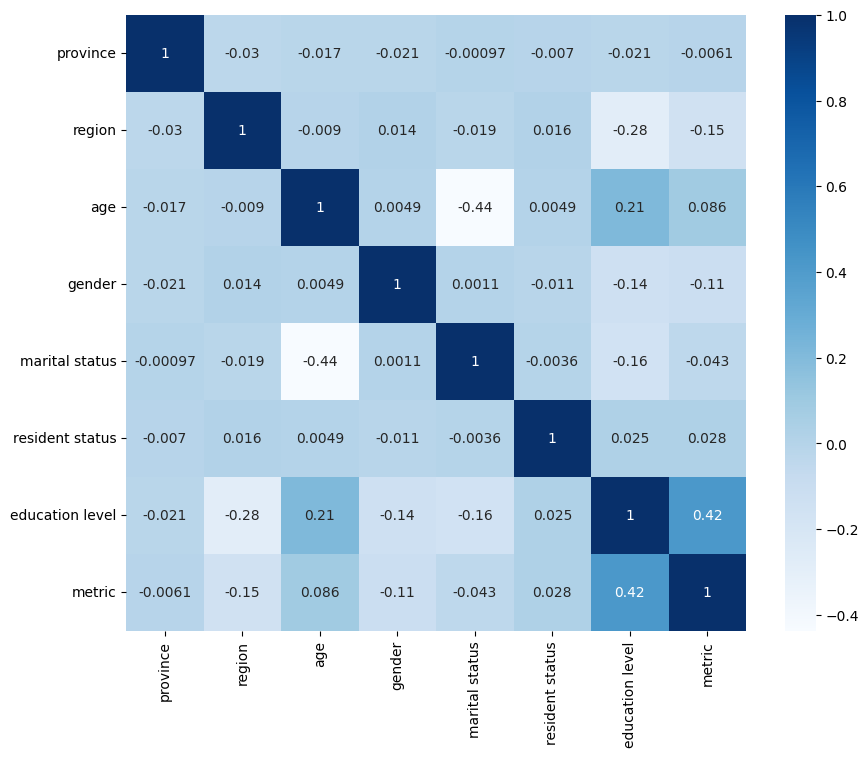

In [41]:
fig, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(df.corr(), cmap = 'Blues', annot = True, ax = ax)